In [1]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt

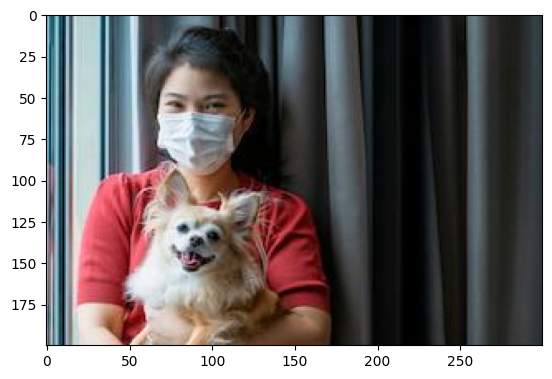

In [2]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/val/chihuahua/img_0_1071.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

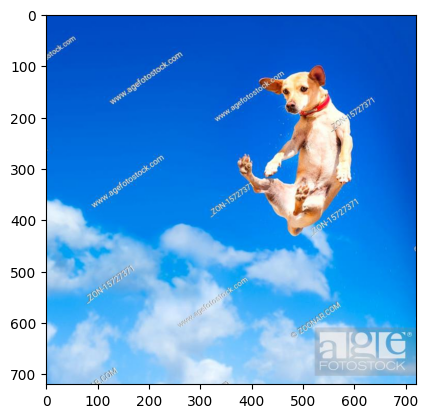

In [3]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/val/chihuahua/img_0_1074.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

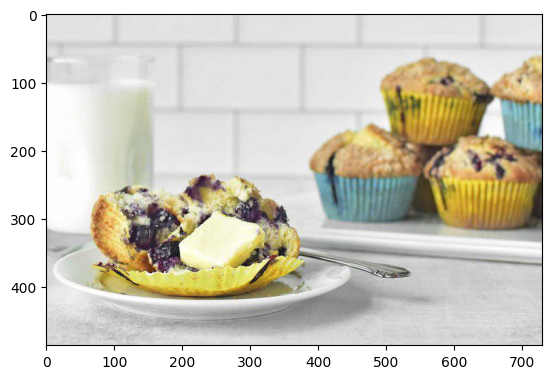

In [4]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/val/muffin/img_0_0.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

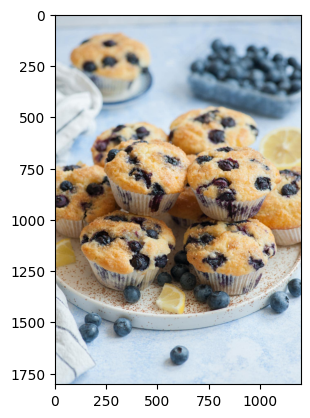

In [5]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/val/muffin/img_0_10.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as ny
import matplotlib.pyplot as plt
import os

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4803 images belonging to 2 classes.


In [9]:
val_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 36 images belonging to 2 classes.


In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
hist = model.fit(
    train_data_importer,
    epochs=20,
    validation_data=val_data_importer
)

Epoch 1/20
151/151 [==============================] - 832s 5s/step - loss: 0.6508 - accuracy: 0.6311 - val_loss: 0.6068 - val_accuracy: 0.7500
Epoch 2/20
151/151 [==============================] - 32s 213ms/step - loss: 0.4735 - accuracy: 0.7856 - val_loss: 0.7094 - val_accuracy: 0.5833
Epoch 3/20
151/151 [==============================] - 32s 213ms/step - loss: 0.3988 - accuracy: 0.8291 - val_loss: 0.3873 - val_accuracy: 0.8333
Epoch 4/20
151/151 [==============================] - 32s 212ms/step - loss: 0.3312 - accuracy: 0.8611 - val_loss: 0.3845 - val_accuracy: 0.8889
Epoch 5/20
151/151 [==============================] - 32s 213ms/step - loss: 0.2842 - accuracy: 0.8842 - val_loss: 0.3560 - val_accuracy: 0.8611
Epoch 6/20
151/151 [==============================] - 32s 212ms/step - loss: 0.2465 - accuracy: 0.9032 - val_loss: 0.4496 - val_accuracy: 0.8056
Epoch 7/20
151/151 [==============================] - 32s 211ms/step - loss: 0.1832 - accuracy: 0.9298 - val_loss: 0.4620 - val_accu

In [13]:
# transfer learning

In [14]:
# prompt: resnet으로 transfer learning code를 만들어줘

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model (excluding top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
  layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (only the newly added layers will be trained)
hist = model.fit(
    train_data_importer,
    epochs=2,  # Adjust the number of epochs as needed
    validation_data=val_data_importer
)


94765736/94765736 [==============================] - 5s 0us/step
Epoch 1/10
151/151 [==============================] - 39s 223ms/step - loss: 0.6121 - accuracy: 0.7164 - val_loss: 0.6122 - val_accuracy: 0.6944
Epoch 2/10
151/151 [==============================] - 32s 213ms/step - loss: 0.4377 - accuracy: 0.8082 - val_loss: 0.5329 - val_accuracy: 0.7500
Epoch 3/10
151/151 [==============================] - 32s 212ms/step - loss: 0.4113 - accuracy: 0.8178 - val_loss: 0.4143 - val_accuracy: 0.7778
Epoch 4/10
151/151 [==============================] - 32s 214ms/step - loss: 0.3786 - accuracy: 0.8314 - val_loss: 0.3964 - val_accuracy: 0.7500
Epoch 5/10
151/151 [==============================] - 32s 213ms/step - loss: 0.3377 - accuracy: 0.8530 - val_loss: 0.4949 - val_accuracy: 0.8056
Epoch 6/10
151/151 [==============================] - 33s 218ms/step - loss: 0.3516 - accuracy: 0.8474 - val_loss: 0.4219 - val_accuracy: 0.8333
Epoch 7/10
151/151 [==============================] - 33s 216ms/s

In [ ]:
# prompt: resnet으로 transfer learning code를 만들어줘

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model (excluding top classification layer)
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
# for layer in base_model.layers:
#   layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (only the newly added layers will be trained)
hist = model.fit(
    train_data_importer,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_data_importer
)


Epoch 1/10
151/151 [==============================] - 64s 229ms/step - loss: 2.5217 - accuracy: 0.5436 - val_loss: 1.0222 - val_accuracy: 0.5000
Epoch 2/10
151/151 [==============================] - 34s 221ms/step - loss: 0.5804 - accuracy: 0.7835 - val_loss: 1.7840 - val_accuracy: 0.5000
Epoch 3/10
151/151 [==============================] - 33s 219ms/step - loss: 0.3886 - accuracy: 0.8438 - val_loss: 0.9788 - val_accuracy: 0.5556
Epoch 4/10
151/151 [==============================] - 34s 223ms/step - loss: 0.3340 - accuracy: 0.8684 - val_loss: 0.7367 - val_accuracy: 0.6667
Epoch 5/10
135/151 [=========================>....] - ETA: 3s - loss: 0.3167 - accuracy: 0.8758